<a href="https://colab.research.google.com/github/Masterjun12/RL/blob/main/pendulum_dqn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!apt-get install x11-utils
!pip install pyglet
!apt-get install -y xvfb python-opengl

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libfontenc1 libxkbfile1 libxtst6 libxxf86dga1
Suggested packages:
  mesa-utils
The following NEW packages will be installed:
  libfontenc1 libxkbfile1 libxtst6 libxxf86dga1 x11-utils
0 upgraded, 5 newly installed, 0 to remove and 19 not upgraded.
Need to get 318 kB of archives.
After this operation, 1,053 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libfontenc1 amd64 1:1.1.4-1build3 [14.7 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libxkbfile1 amd64 1:1.1.0-1build3 [71.8 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/main amd64 libxtst6 amd64 2:1.2.3-1build4 [13.4 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/main amd64 libxxf86dga1 amd64 2:1.1.5-0ubuntu3 [12.6 kB]
Get:5 http://archive.ubuntu.com/ubuntu jammy/main amd64 x11-utils amd64 7.7+5build2 [206 kB]
Fetched

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from IPython import display as ipythondisplay

In [ ]:
from gym import envs
all_envs = envs.registry.all()
env_ids = [env_spec.id for env_spec in all_envs]
print(sorted(env_ids))

['Acrobot-v1', 'Ant-v2', 'Ant-v3', 'Ant-v4', 'BipedalWalker-v3', 'BipedalWalkerHardcore-v3', 'Blackjack-v1', 'CarRacing-v2', 'CartPole-v0', 'CartPole-v1', 'CliffWalking-v0', 'FrozenLake-v1', 'FrozenLake8x8-v1', 'HalfCheetah-v2', 'HalfCheetah-v3', 'HalfCheetah-v4', 'Hopper-v2', 'Hopper-v3', 'Hopper-v4', 'Humanoid-v2', 'Humanoid-v3', 'Humanoid-v4', 'HumanoidStandup-v2', 'HumanoidStandup-v4', 'InvertedDoublePendulum-v2', 'InvertedDoublePendulum-v4', 'InvertedPendulum-v2', 'InvertedPendulum-v4', 'LunarLander-v2', 'LunarLanderContinuous-v2', 'MountainCar-v0', 'MountainCarContinuous-v0', 'Pendulum-v1', 'Pusher-v2', 'Pusher-v4', 'Reacher-v2', 'Reacher-v4', 'Swimmer-v2', 'Swimmer-v3', 'Swimmer-v4', 'Taxi-v3', 'Walker2d-v2', 'Walker2d-v3', 'Walker2d-v4']


/usr/local/lib/python3.10/dist-packages/gym/envs/registration.py:421: UserWarning: WARN: The `registry.all` method is deprecated. Please use `registry.values` instead.
  logger.warn(


In [ ]:
import gym
env = gym.make("Pendulum-v1").env

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [ ]:
print('State space: ' , env.observation_space) # 상태 액션 확인
print("Action space:", env.action_space)

State space:  Box([-1. -1. -8.], [1. 1. 8.], (3,), float32)
Action space: Box(-2.0, 2.0, (1,), float32)


In [ ]:
import imageio

In [ ]:
nb_actions = env.action_space

nb_obs = env.observation_space

In [ ]:
from collections import deque

In [ ]:
class DQNAgent:
    def __init__(self):
        self.state_dim = 3
        self.action_dim = 9
        self.lr = 0.01
        self.gamma = 0.98
        self.tau = 0.01
        self.epsilon = 1.0
        self.epsilon_decay = 0.98
        self.epsilon_min = 0.001
        self.buffer_size = 1000000
        self.batch_size = 64
        self.memory = ReplayBuffer(self.buffer_size)

        self.Q = QNetwork(self.state_dim, self.action_dim, self.lr)
        self.Q_target = QNetwork(self.state_dim, self.action_dim, self.lr)
        self.Q_target.load_state_dict(self.Q.state_dict())

In [ ]:
class ReplayBuffer:
    def __init__(self, buffer_limit):
        self.buffer = deque(maxlen=buffer_limit)

    def put(self, transition):
        self.buffer.append(transition)

In [ ]:
import torch.nn as nn
import torch.optim as optim


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
class QNetwork(nn.Module):
    def __init__(self, state_dim, action_dim, q_lr):
        super(QNetwork, self).__init__()

        self.fc_1 = nn.Linear(state_dim, 64)
        self.fc_2 = nn.Linear(64, 32)
        self.fc_out = nn.Linear(32, action_dim)

        self.lr = q_lr

        self.optimizer = optim.Adam(self.parameters(), lr = self.lr)



In [ ]:
agent = DQNAgent()


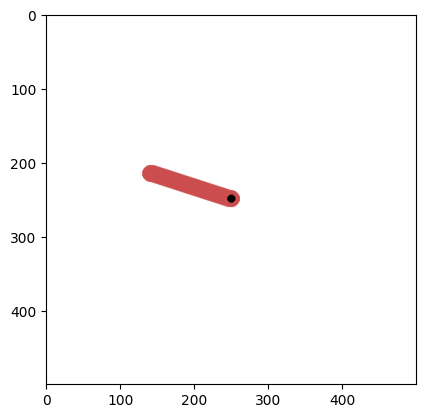

In [ ]:
from IPython.lib.pretty import Breakable
import pygame
env.reset()
pygame.init()

prev_screen = env.render(mode='rgb_array')
plt.imshow(prev_screen)

for i_episodes_2 in range(10001):
    action=env.reset()
    agent, reward, done, info = env.step(action)
    screen = env.render(mode = 'rgb_array')
    plt.imshow(prev_screen)
    ipythondisplay.clear_output(wait=True)
    ipythondisplay.display(plt.gcf())

    if done:
        break

ipythondisplay.clear_output(wait=True)
env.close()